## Time Series EDA
- Single continuous variable over (uniformly distributed) time
- Understand temporal behavior of data: trend and seasonality, cycle
- Identify underlying distribution and nature of temporal processes producing data

#### Setup
°F = (K - 273.15) x 1.8000 + 32.00

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [2]:
# read csv file. Specify 'datetime' column as index column, parse dates and sort index

df = pd.read_csv('sa_temps.csv', index_col='datetime', parse_dates=True).sort_index()
df.temp = (df.temp - 273.15) * 1.8 + 32

print('Date Range:', df.index.min(), 'to', df.index.max())
print('Shape:', df.shape)

Date Range: 2012-10-01 13:00:00 to 2017-11-30 00:00:00
Shape: (45252, 1)


In [3]:
df.head()

,temp
datetime,
2012-10-01 13:00:00,61.052000
2012-10-01 14:00:00,61.076568
2012-10-01 15:00:00,61.139294
2012-10-01 16:00:00,61.202020
2012-10-01 17:00:00,61.264747


- **seasonality**: a repeated cycle in the data. Occurs at a fixed frequency. In our weather data there is yearly and daily seasonality  
    - Quite common in economic time series. It is less common in engineering and scientific data.
    - Can help us understand underlying dynamics


- **trend**: long term upwards or downwards movement  
- **cycle**: Some arbitrary chunk of time, usually longer than a season, or consists of multiple seasons

### Data Splitting

- Ideally all splits contain a season
- Human-based
- Percentage based
- Cross Validation

### Percentage-Based

In [4]:
# check shape of data
df.shape

(45252, 1)

In [5]:
# Lets use 70/30 train test split %

train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)
test_start_index

31676

In [6]:
# create train and test dataframe

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

In [7]:
train

,temp
datetime,
2012-10-01 13:00:00,61.052000
2012-10-01 14:00:00,61.076568
2012-10-01 15:00:00,61.139294
2012-10-01 16:00:00,61.202020
2012-10-01 17:00:00,61.264747
...,...
2016-05-13 04:00:00,75.614000
2016-05-13 05:00:00,75.002000
2016-05-13 06:00:00,74.246000


In [8]:
test

,temp
datetime,
2016-05-13 09:00:00,73.112
2016-05-13 10:00:00,71.546
2016-05-13 11:00:00,71.222
2016-05-13 12:00:00,70.754
2016-05-13 13:00:00,72.644
...,...
2017-11-29 20:00:00,70.790
2017-11-29 21:00:00,72.806
2017-11-29 22:00:00,73.202


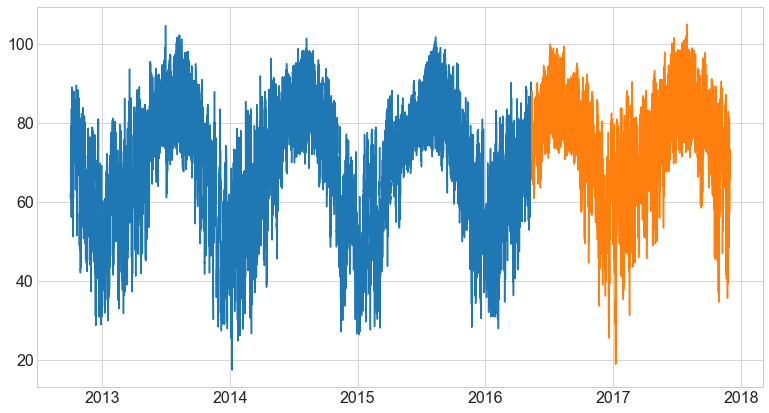

In [9]:
# lets plot train and test

plt.plot(train.index, train.temp)
plt.plot(test.index, test.temp)

### Human-Based

In [10]:
df['2016']

,temp
datetime,
2016-01-01 00:00:00,52.034000
2016-01-01 01:00:00,52.028268
2016-01-01 02:00:00,50.881834
2016-01-01 03:00:00,50.972000
2016-01-01 04:00:00,50.432000
...,...
2016-12-31 19:00:00,63.230000
2016-12-31 20:00:00,68.216000
2016-12-31 21:00:00,70.664000


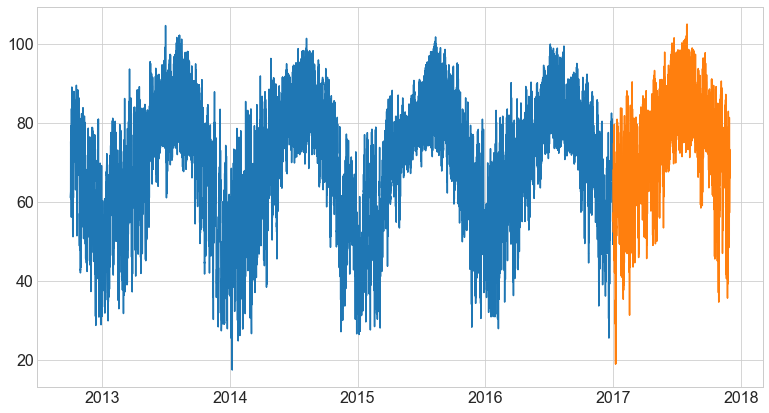

In [11]:
# Anything upto (and including) 2016 as train and rest as test

train = df[:'2016'] # includes 2016
test = df['2017']

# plot the train and test
plt.plot(train.index, train.temp)
plt.plot(test.index, test.temp)

### Sklearn Cross-validation: 
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html

Visuals:
https://github.com/scikit-learn/scikit-learn/issues/14376

## Visualizations

In [12]:
# we will do visualization on train only:
train.head()

,temp
datetime,
2012-10-01 13:00:00,61.052000
2012-10-01 14:00:00,61.076568
2012-10-01 15:00:00,61.139294
2012-10-01 16:00:00,61.202020
2012-10-01 17:00:00,61.264747


In [13]:
# create a series called 'y'

y = train.temp
y.head()

datetime
2012-10-01 13:00:00    61.052000
2012-10-01 14:00:00    61.076568
2012-10-01 15:00:00    61.139294
2012-10-01 16:00:00    61.202020
2012-10-01 17:00:00    61.264747
Name: temp, dtype: float64

### Don't consider the time series

<AxesSubplot:ylabel='Frequency'>

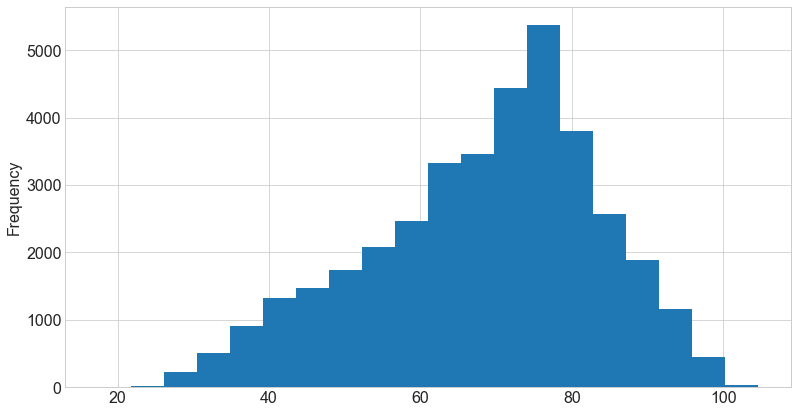

In [15]:
# plot a histogram of temperature
y.plot.hist(bins = 20)

- by month
- by weekday

In [16]:
y.index.month

Int64Index([10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='datetime', length=37259)

In [17]:
train['month'] = y.index.month

<ipython-input-17-6944ed8e700e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['month'] = y.index.month


In [18]:
train.head()

,temp,month
datetime,,
2012-10-01 13:00:00,61.052000,10
2012-10-01 14:00:00,61.076568,10
2012-10-01 15:00:00,61.139294,10
2012-10-01 16:00:00,61.202020,10
2012-10-01 17:00:00,61.264747,10


In [19]:
train.groupby('month').temp.mean()

month
1     49.831129
2     55.558854
3     61.421913
4     68.855211
5     73.742506
6     80.614231
7     83.449665
8     83.964775
9     79.356778
10    72.065809
11    60.545556
12    54.689498
Name: temp, dtype: float64

<AxesSubplot:xlabel='month'>

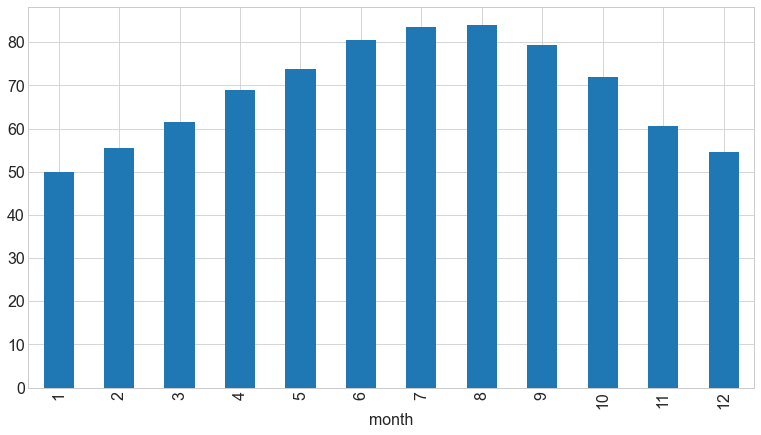

In [20]:
train.groupby('month').temp.mean().plot.bar()

[Text(0.5, 1.0, 'Average Temperature by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Temp (F)')]

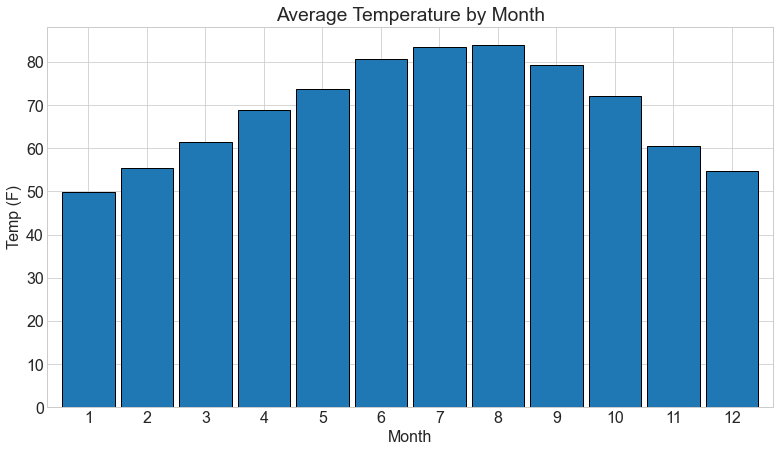

In [21]:
# Plot mean temperature by month (bar plot)

ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Temperature by Month', xlabel='Month', ylabel='Temp (F)')

In [22]:
train['weekday'] = y.index.day_name()

<ipython-input-22-e5c6cdb7c1e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['weekday'] = y.index.day_name()


In [23]:
train.head()

,temp,month,weekday
datetime,,,
2012-10-01 13:00:00,61.052000,10,Monday
2012-10-01 14:00:00,61.076568,10,Monday
2012-10-01 15:00:00,61.139294,10,Monday
2012-10-01 16:00:00,61.202020,10,Monday
2012-10-01 17:00:00,61.264747,10,Monday


[Text(0.5, 1.0, 'Average Temperature by Weekday'),
 Text(0.5, 22.200000000000003, 'Weekday'),
 Text(22.200000000000003, 0.5, 'Temp (F)')]

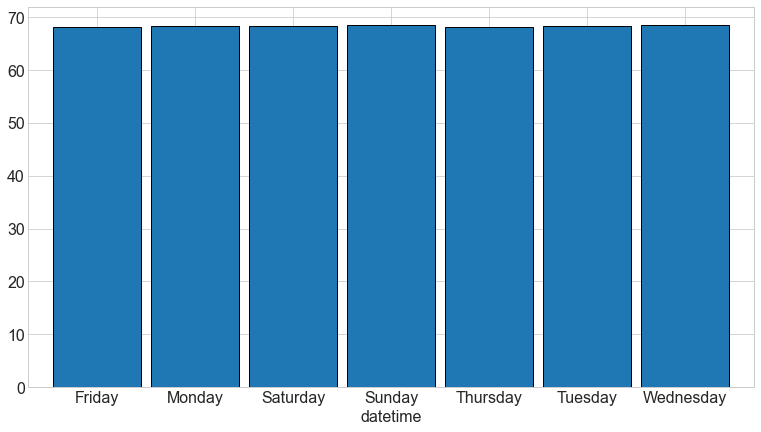

In [24]:
# Plot mean temperature by weekday

y.groupby(y.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Temperature by Weekday', xlabel='Weekday', ylabel='Temp (F)')

#### What if we want to visualize more than just the mean temperature?

In [26]:
train.groupby('weekday').describe().T

weekday           Friday       Monday     Saturday       Sunday     Thursday  \
temp  count  5328.000000  5315.000000  5328.000000  5304.000000  5328.000000   
      mean     68.170992    68.326222    68.376767    68.551504    68.195680   
      std      15.382317    15.330057    14.682317    14.673979    15.571015   
      min      24.782000    24.656000    26.474000    27.878000    27.207800   
      25%      58.215500    58.541900    59.342000    59.684000    57.596000   
      50%      71.105000    70.952000    70.159805    70.195400    71.348000   
      75%      78.476000    79.034000    78.587375    78.836000    79.235660   
      max     102.092000   101.516000   101.804000   104.540000   102.038000   
month count  5328.000000  5315.000000  5328.000000  5304.000000  5328.000000   
      mean      6.747748     6.825588     6.779279     6.787330     6.765766   
      std       3.518541     3.501957     3.520021     3.506630     3.528736   
      min       1.000000     1.000000     1.000000     1.000000     1.000000   
      25%       4.000000     4.000000     4.000000     4.000000     4.000000   
      50%       7.000000     7.000000     7.000000     7.000000     7.000000   
      75%      10.000000    10.000000    10.000000    10.000000    10.000000   
      max      12.000000    12.000000    12.000000    12.000000    12.000000   

weekday          Tuesday    Wednesday  
temp  count  5328.000000  5328.000000  
      mean     68.417980    68.481428  
      std      15.380445    15.146799  
      min      17.420000    26.150000  
      25%      58.509500    57.989750  
      50%      71.432678    71.280884  
      75%      79.160000    79.206350  
      max     101.660000   100.713800  
month count  5328.000000  5328.000000  
      mean      6.815315     6.788288  
      std       3.511847     3.510321  
      min       1.000000     1.000000  
      25%       4.000000     4.000000  
      50%       7.000000     7.000000  
      75%      10.000000    10.000000  
      max      12.000000    12.000000

<AxesSubplot:xlabel='weekday', ylabel='temp'>

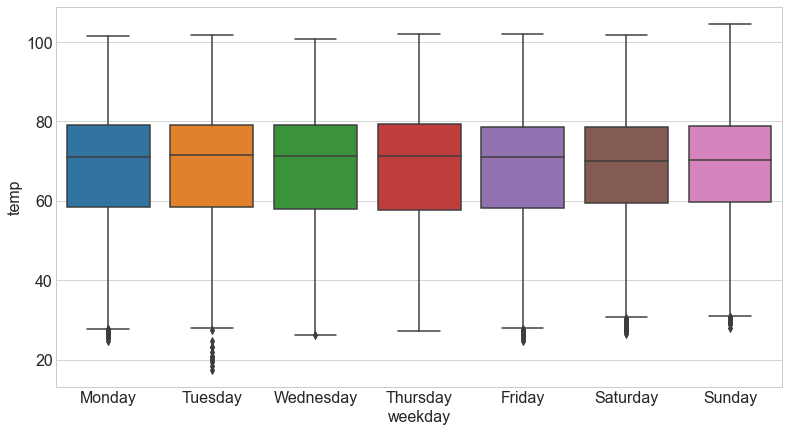

In [27]:
sns.boxplot(data = train, x = 'weekday', y = 'temp')

In [ ]:
# Anything interesting in the chart above?

# Would the monthly boxplot look different?

[Text(0.5, 1.0, 'Average Temperature by Month'),
 Text(0.5, 22.200000000000003, 'month'),
 Text(22.200000000000003, 0.5, 'Temp (F)')]

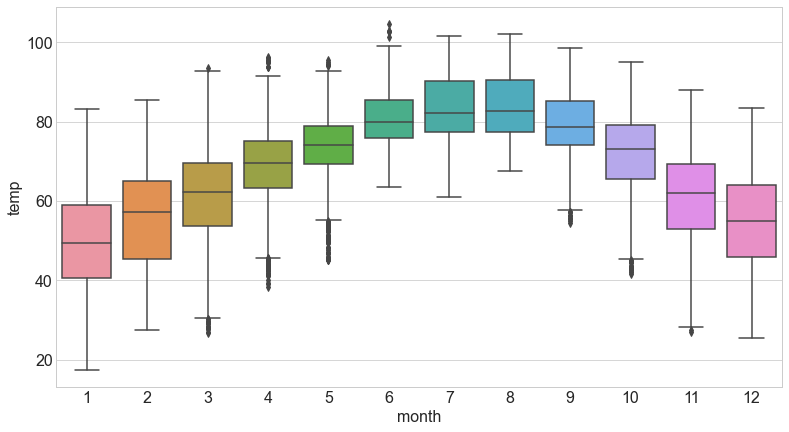

In [29]:
sns.boxplot(data = train, x = 'month', y = 'temp')


- more variation in fall and winter
- less variation in summer months


### Visualize the target over time

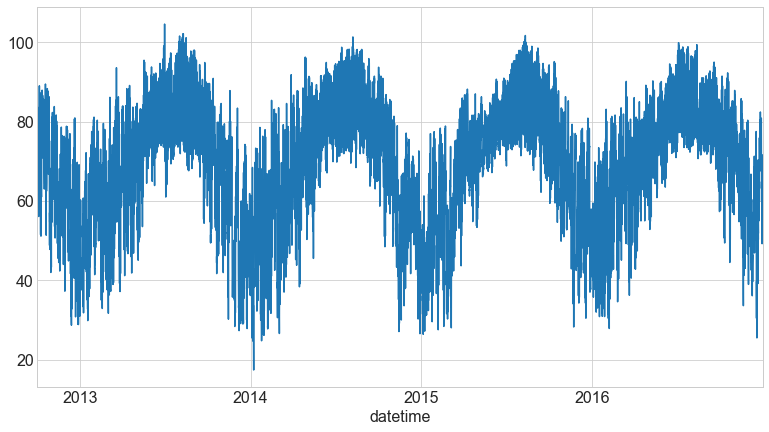

In [30]:
y.plot();

In [31]:
y.resample('6H').mean()

datetime
2012-10-01 12:00:00    61.146926
2012-10-01 18:00:00    61.484289
2012-10-02 00:00:00    61.860647
2012-10-02 06:00:00    62.237005
2012-10-02 12:00:00    67.857637
                         ...    
2016-12-30 18:00:00    54.620000
2016-12-31 00:00:00    51.869000
2016-12-31 06:00:00    52.493000
2016-12-31 12:00:00    54.998000
2016-12-31 18:00:00    67.256000
Freq: 6H, Name: temp, Length: 6210, dtype: float64

<AxesSubplot:title={'center':'6 hour average'}, xlabel='datetime'>

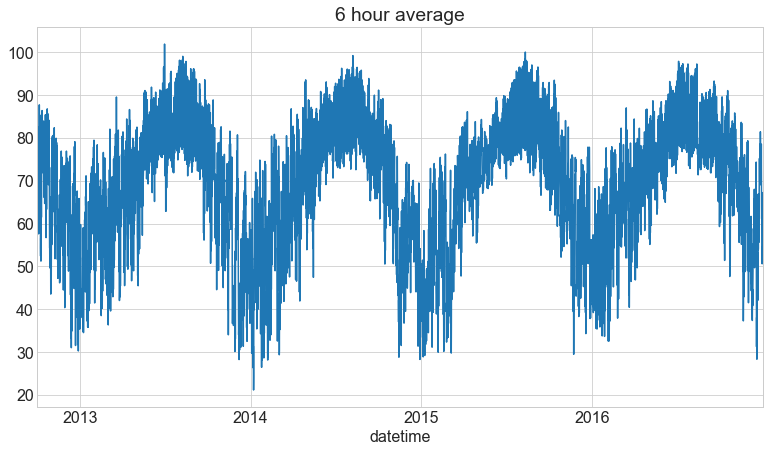

In [32]:
y.resample('6H').mean().plot(title='6 hour average')

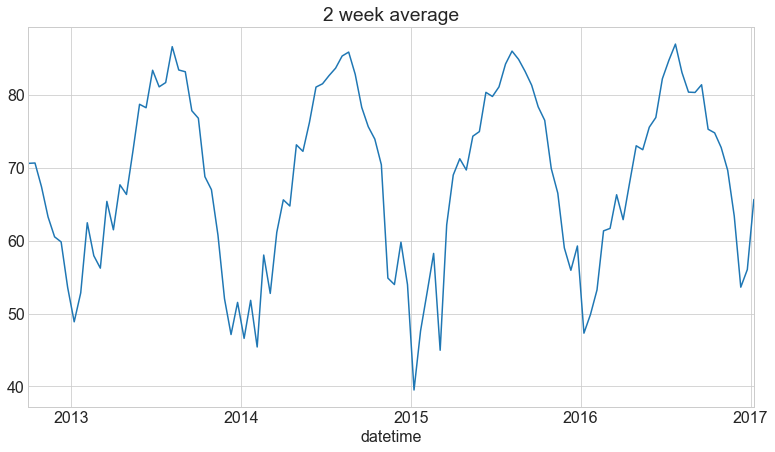

In [33]:
y.resample('2W').mean().plot(title='2 week average');

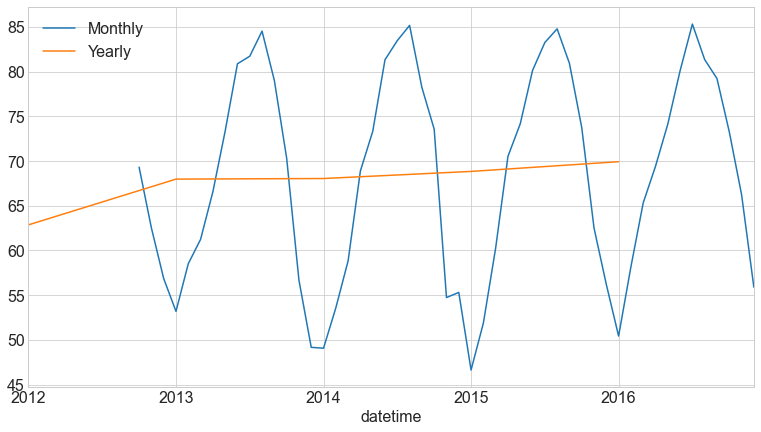

In [34]:
y.resample('M').mean().plot(label = 'Monthly')
y.resample('Y').mean().plot(label = 'Yearly')
plt.legend()

<AxesSubplot:xlabel='datetime'>

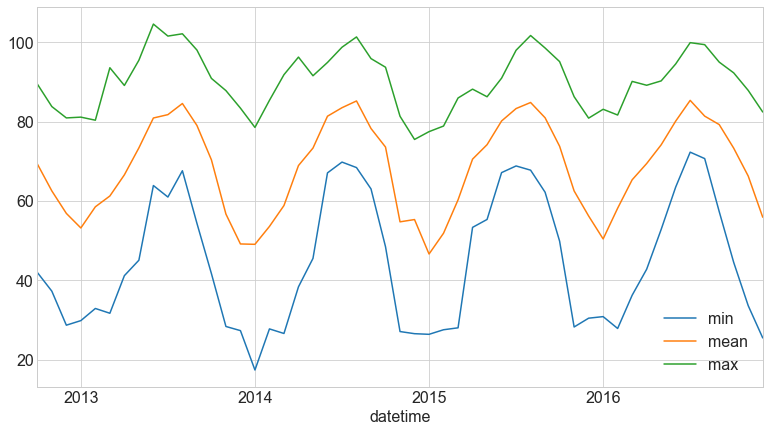

In [35]:
y.resample('M').agg(['min', 'mean', 'max']).plot()


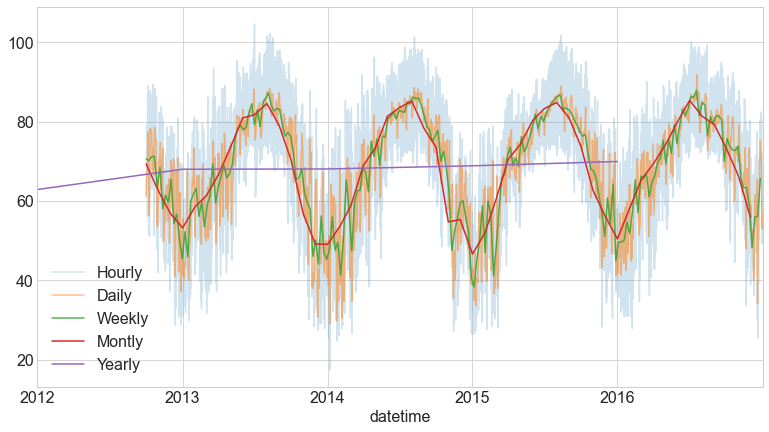

In [36]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

#### We can reduce noise by resampling data the data to longer frequencies.

## Seasonaility to Trend


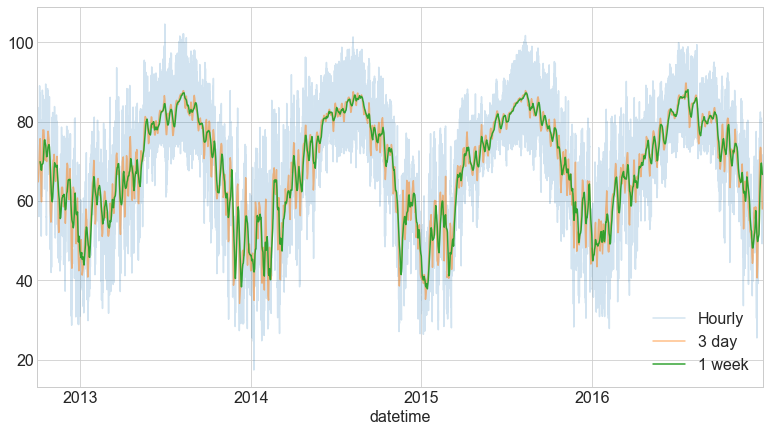

In [37]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('D').mean().rolling(7).mean().plot(alpha=8, label='1 week')
plt.legend()

### Visualize change over time

In [39]:
y.resample('W').mean()

datetime
2012-10-07    70.595201
2012-10-14    70.152821
2012-10-21    71.138375
2012-10-28    71.230464
2012-11-04    63.510554
                ...    
2016-12-04    59.062094
2016-12-11    48.163625
2016-12-18    55.979132
2016-12-25    56.073143
2017-01-01    65.640625
Freq: W-SUN, Name: temp, Length: 222, dtype: float64

In [40]:
y.resample('W').mean().diff()

datetime
2012-10-07          NaN
2012-10-14    -0.442379
2012-10-21     0.985554
2012-10-28     0.092089
2012-11-04    -7.719911
                ...    
2016-12-04    -4.340288
2016-12-11   -10.898468
2016-12-18     7.815506
2016-12-25     0.094012
2017-01-01     9.567482
Freq: W-SUN, Name: temp, Length: 222, dtype: float64

<AxesSubplot:title={'center':'Average week-to-week change in temperature'}, xlabel='datetime'>

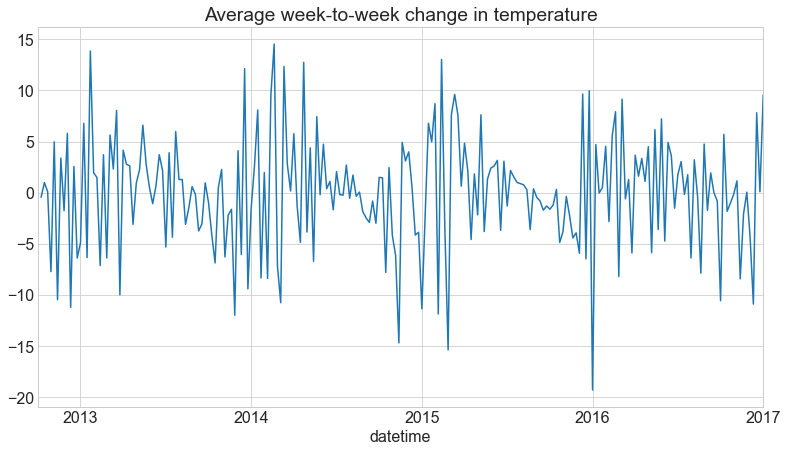

In [38]:
# again more weekly temp variance in winter months
y.resample('W').mean().diff().plot(title='Average week-to-week change in temperature')

<AxesSubplot:title={'center':'Average month-to-month change in temperature'}, xlabel='datetime'>

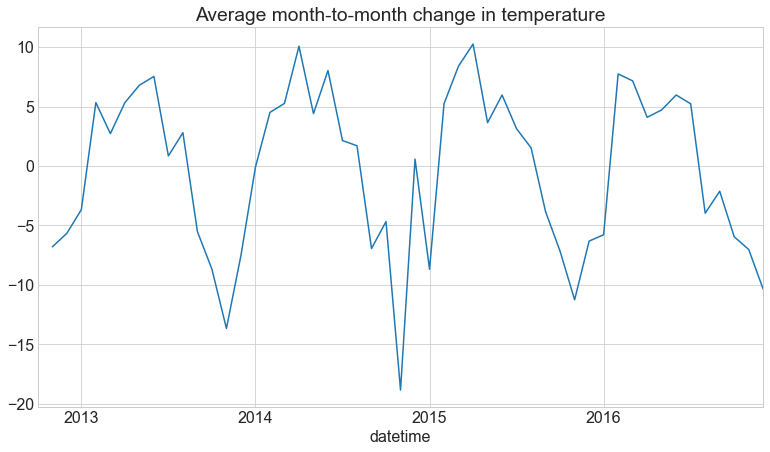

In [41]:
y.resample('M').mean().diff().plot(title='Average month-to-month change in temperature')

### Seasonal Plot
- comparison of multiple years together.

In [42]:
y

datetime
2012-10-01 13:00:00    61.052000
2012-10-01 14:00:00    61.076568
2012-10-01 15:00:00    61.139294
2012-10-01 16:00:00    61.202020
2012-10-01 17:00:00    61.264747
                         ...    
2016-12-31 19:00:00    63.230000
2016-12-31 20:00:00    68.216000
2016-12-31 21:00:00    70.664000
2016-12-31 22:00:00    71.348000
2016-12-31 23:00:00    71.600000
Name: temp, Length: 37259, dtype: float64

In [43]:
y.groupby([y.index.year, y.index.month]).mean()

datetime  datetime
2012      10          69.318705
          11          62.521575
          12          56.860014
2013      1           53.192333
          2           58.522799
          3           61.244479
          4           66.569717
          5           73.358529
          6           80.885728
          7           81.731819
          8           84.534117
          9           79.016805
          10          70.343832
          11          56.686028
          12          49.165310
2014      1           49.072897
          2           53.579080
          3           58.842459
          4           68.908933
          5           73.311970
          6           81.337658
          7           83.476876
          8           85.178102
          9           78.238621
          10          73.567252
          11          54.735951
          12          55.311824
2015      1           46.631940
          2           51.874683
          3           60.277705
          4          

In [45]:
# changes outermost r0ws to columns

y.groupby([y.index.year, y.index.month]).mean().unstack(0)

datetime,2012,2013,2014,2015,2016
datetime,,,,,
1,NaN,53.192333,49.072897,46.631940,50.427347
2,NaN,58.522799,53.579080,51.874683,58.165749
3,NaN,61.244479,58.842459,60.277705,65.323011
4,NaN,66.569717,68.908933,70.526879,69.415316
5,NaN,73.358529,73.311970,74.169747,74.129780
6,NaN,80.885728,81.337658,80.135967,80.097570
7,NaN,81.731819,83.476876,83.264325,85.325640
8,NaN,84.534117,85.178102,84.789859,81.357023
9,NaN,79.016805,78.238621,80.938208,79.233476


<AxesSubplot:title={'center':'Average Monthly Temperature by Year'}, xlabel='datetime'>

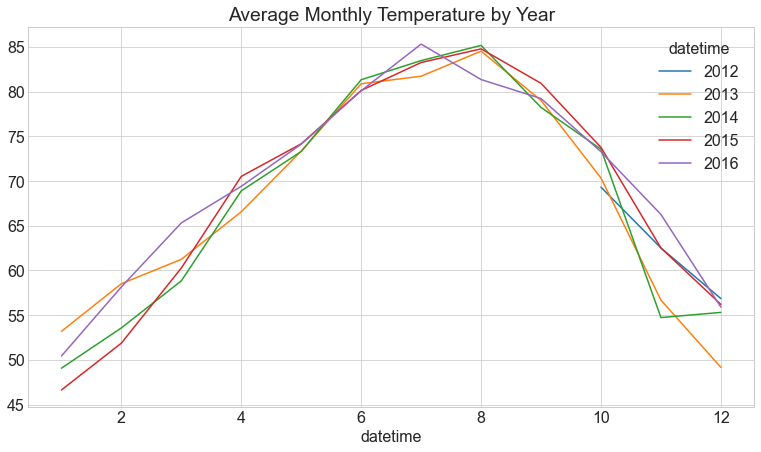

In [47]:
# unstack is similar to pivot_table. It turns an index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title="Average Monthly Temperature by Year")

### Seasonal Subseries Plot
A seasonal subseries plot shows the change year-over-year within each month.

In [48]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()
table

datetime,1,2,3,4,5,6,7,8,9,10,11,12
datetime,,,,,,,,,,,,
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.318705,62.521575,56.860014
2013,53.192333,58.522799,61.244479,66.569717,73.358529,80.885728,81.731819,84.534117,79.016805,70.343832,56.686028,49.165310
2014,49.072897,53.579080,58.842459,68.908933,73.311970,81.337658,83.476876,85.178102,78.238621,73.567252,54.735951,55.311824
2015,46.631940,51.874683,60.277705,70.526879,74.169747,80.135967,83.264325,84.789859,80.938208,73.766466,62.519181,56.207118
2016,50.427347,58.165749,65.323011,69.415316,74.129780,80.097570,85.325640,81.357023,79.233476,73.284788,66.265047,55.903224


In [50]:
x1 = [1, 2, 3]
x2 = ['a', 'b', 'c']

for i in zip(x1, x2):
    print(i)

(1, 'a')
(2, 'b')
(3, 'c')


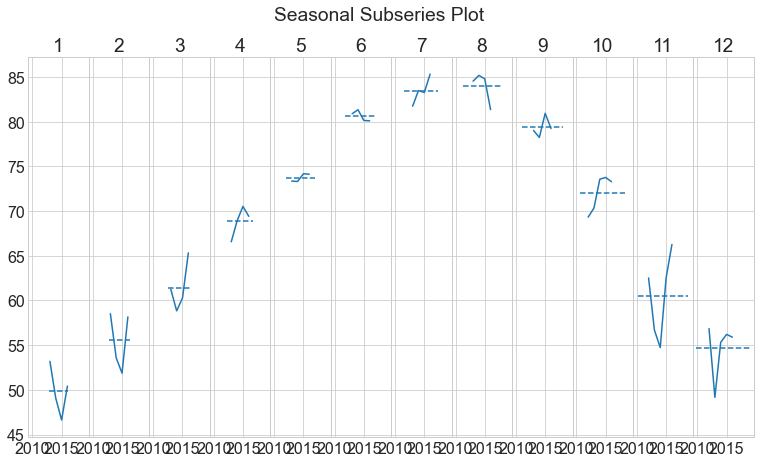

In [49]:
#make 12 subplot and share axis
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)

#gets 1st axis and 1st column of table
for ax, (month, subset) in zip(axs, table.iteritems()):
    
    #plot
    subset.plot(ax=ax, title=month)
    x_left, x_right = ax.get_xlim()
    ax.hlines(subset.mean(), x_left, x_right, ls='--')
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

In [ ]:
train[train.month == 1].groupby(train[train.])

#### As with the monthly box plot, the seasonal pattern is quite evident in the seasonal subseries.

- Do the data exhibit a seasonal pattern?
- What is the nature of the seasonality?
- Is there a within-group pattern (e.g., do January and July exhibit similar patterns)?
- Are there any outliers once seasonality has been accounted for?

- Should I use box plot instead?

### What if seasonality is not that readily apparent?

Is there a seasonality in this data?

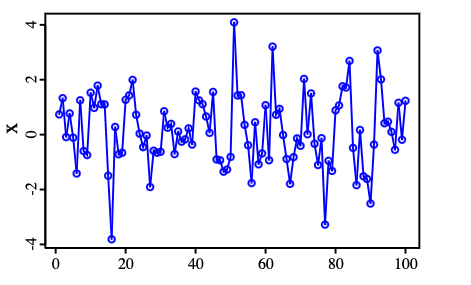

### Lag plot

In [51]:
y.shift(-1)

datetime
2012-10-01 13:00:00    61.076568
2012-10-01 14:00:00    61.139294
2012-10-01 15:00:00    61.202020
2012-10-01 16:00:00    61.264747
2012-10-01 17:00:00    61.327473
                         ...    
2016-12-31 19:00:00    68.216000
2016-12-31 20:00:00    70.664000
2016-12-31 21:00:00    71.348000
2016-12-31 22:00:00    71.600000
2016-12-31 23:00:00          NaN
Name: temp, Length: 37259, dtype: float64

Text(0.5, 1.0, 'Lag plot with lag = 1')

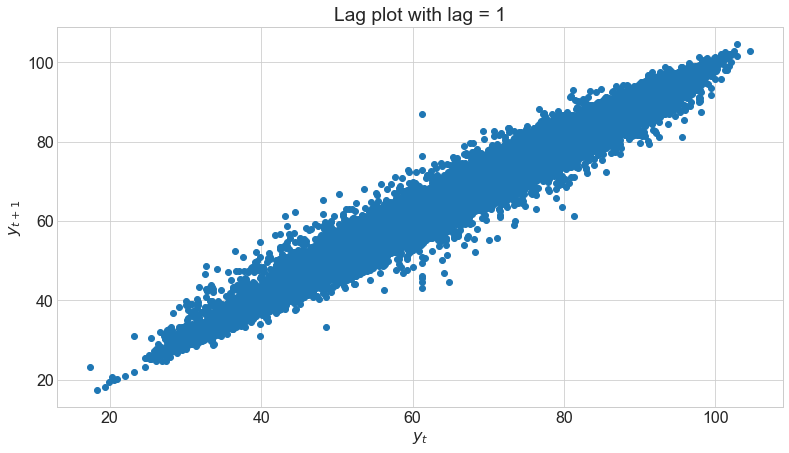

In [52]:
plt.scatter(y, y.shift(-1))
plt.xlabel('$y_t$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag = 1')

<AxesSubplot:xlabel='temp', ylabel='temp_next_day'>

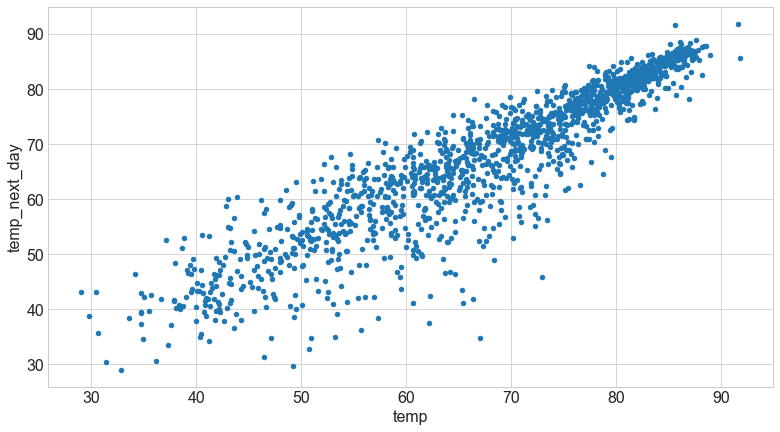

In [53]:
daily = train.resample('D').mean()
daily['temp_next_day'] = daily.temp.shift(-1)
daily.plot.scatter(x='temp', y='temp_next_day')

In [54]:
weekly = train.resample('W').mean()
weekly['temp_next_week'] = weekly.temp.shift(-1)

weekly

,temp,month,temp_next_week
datetime,,,
2012-10-07,70.595201,10.000000,70.152821
2012-10-14,70.152821,10.000000,71.138375
2012-10-21,71.138375,10.000000,71.230464
2012-10-28,71.230464,10.000000,63.510554
2012-11-04,63.510554,10.571429,68.482625
...,...,...,...
2016-12-04,59.062094,11.571429,48.163625
2016-12-11,48.163625,12.000000,55.979132
2016-12-18,55.979132,12.000000,56.073143


,this_week,month,1_week_out
datetime,,,
2012-10-07,70.595201,10.000000,70.152821
2012-10-14,70.152821,10.000000,71.138375
2012-10-21,71.138375,10.000000,71.230464
2012-10-28,71.230464,10.000000,63.510554
2012-11-04,63.510554,10.571429,68.482625
...,...,...,...
2016-12-04,59.062094,11.571429,48.163625
2016-12-11,48.163625,12.000000,55.979132
2016-12-18,55.979132,12.000000,56.073143


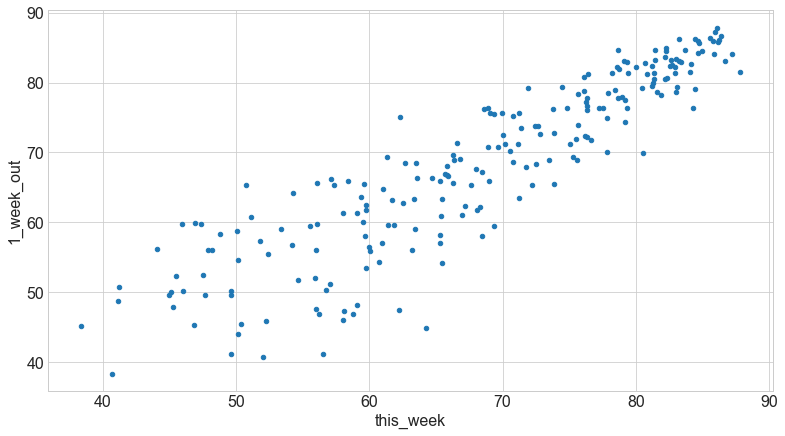

In [57]:
weekly = train.resample('W').mean()
weekly['1_week_out'] = weekly.temp.shift(-1)
weekly = weekly.rename(columns={'temp': 'this_week'})
weekly.plot.scatter(x='this_week', y='1_week_out')
weekly

,this_week,month,12_weeks_out
datetime,,,
2012-10-07,70.595201,10.000000,50.376741
2012-10-14,70.152821,10.000000,45.473616
2012-10-21,71.138375,10.000000,52.252877
2012-10-28,71.230464,10.000000,45.907936
2012-11-04,63.510554,10.571429,59.763739
...,...,...,...
2016-12-04,59.062094,11.571429,NaN
2016-12-11,48.163625,12.000000,NaN
2016-12-18,55.979132,12.000000,NaN


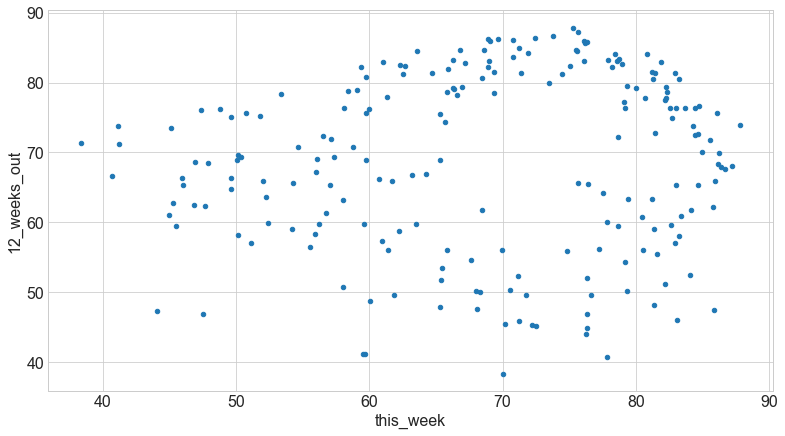

In [55]:
weekly = train.resample('W').mean()
weekly['12_weeks_out'] = weekly.temp.shift(-12)
weekly = weekly.rename(columns={'temp': 'this_week'})
weekly.plot.scatter(x='this_week', y='12_weeks_out')
weekly

,this_week,month,26_weeks_out
datetime,,,
2012-10-07,70.595201,10.000000,63.558611
2012-10-14,70.152821,10.000000,66.345532
2012-10-21,71.138375,10.000000,68.965502
2012-10-28,71.230464,10.000000,65.862071
2012-11-04,63.510554,10.571429,66.797107
...,...,...,...
2016-12-04,59.062094,11.571429,NaN
2016-12-11,48.163625,12.000000,NaN
2016-12-18,55.979132,12.000000,NaN


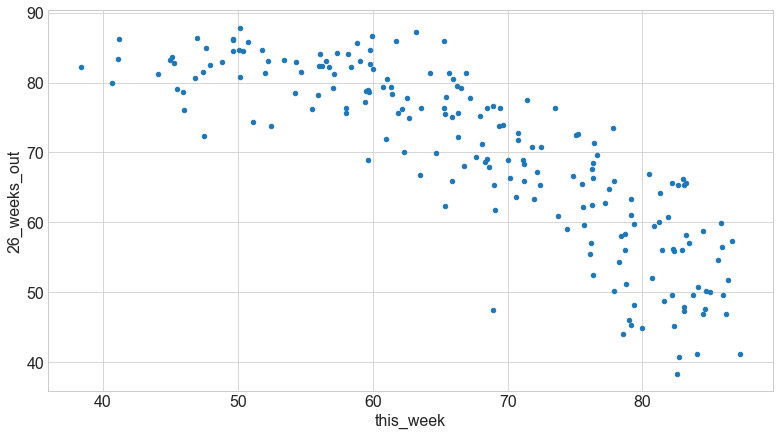

In [58]:
weekly = train.resample('W').mean()
weekly['26_weeks_out'] = weekly.temp.shift(-26)
weekly = weekly.rename(columns={'temp': 'this_week'})
weekly.plot.scatter(x='this_week', y='26_weeks_out')
weekly

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 26)'>

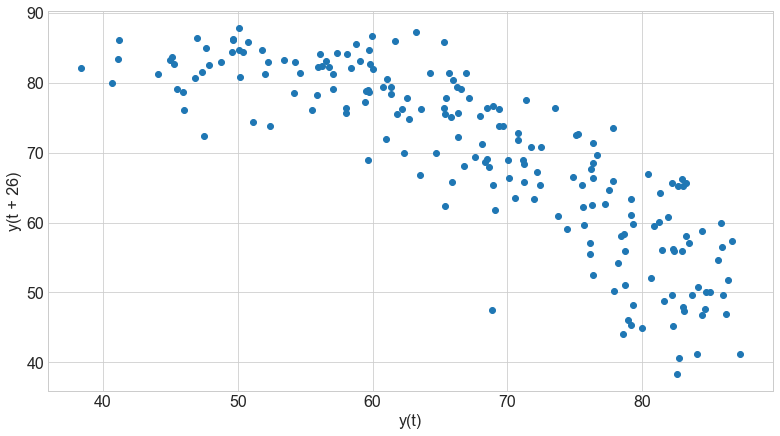

In [59]:
# easier way. Use pd.plotting.lag_plot(series, lag):

pd.plotting.lag_plot(train.temp.resample('W').mean(), lag=26)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 52)'>

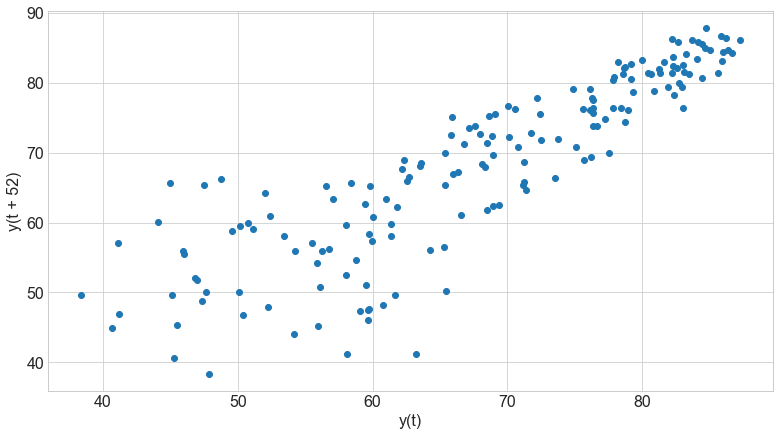

In [60]:
pd.plotting.lag_plot(train.temp.resample('W').mean(), lag=52)

### Autocorrelation Plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

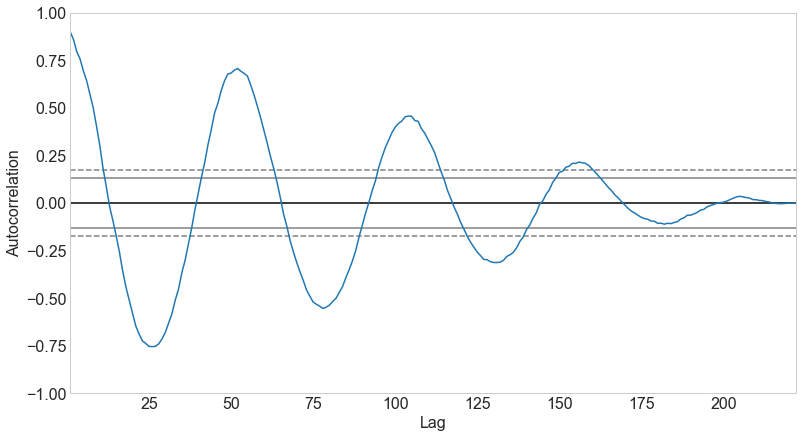

In [61]:
#y-axis is the r: correlation coefficient
# horizontal lines are the confidence intervals
# if the curve is INSIDE the horizontal lines, not confident

pd.plotting.autocorrelation_plot(train.temp.resample('W').mean())

### What does autocorrelation plot look like for white noise

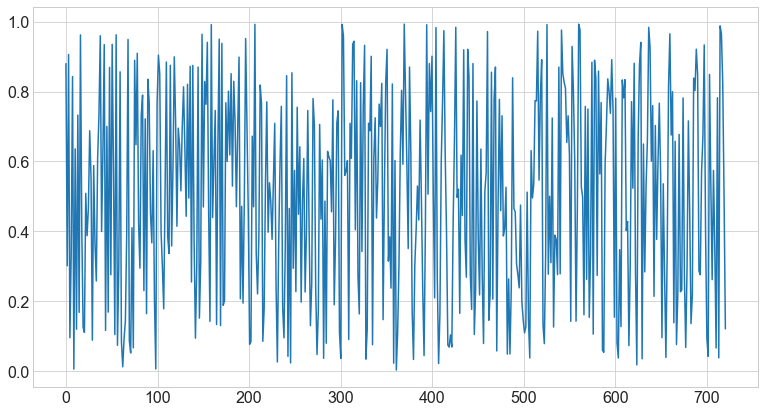

In [62]:
grid = np.linspace(0, 720, 500)
noise = np.random.rand(500)
# result_curve =  noise
plt.plot(grid, noise)

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:652: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


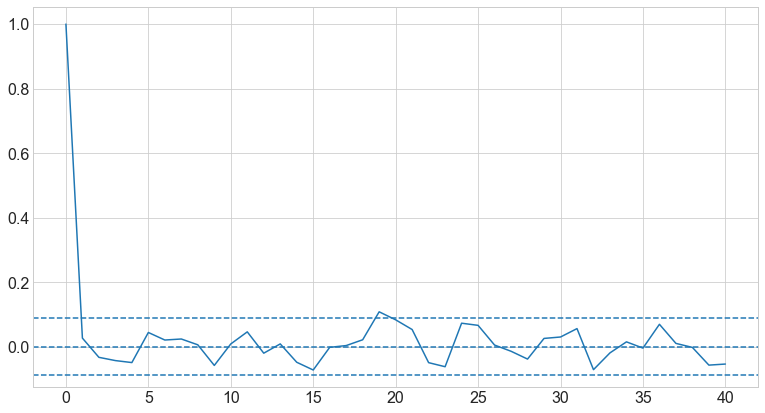

In [63]:
from statsmodels.tsa import stattools

acf_result = stattools.acf(noise)
plt.plot(acf_result)
plt.axhline(y=0,linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(noise)),linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(noise)),linestyle='--')

### Another example of Autocorrelation

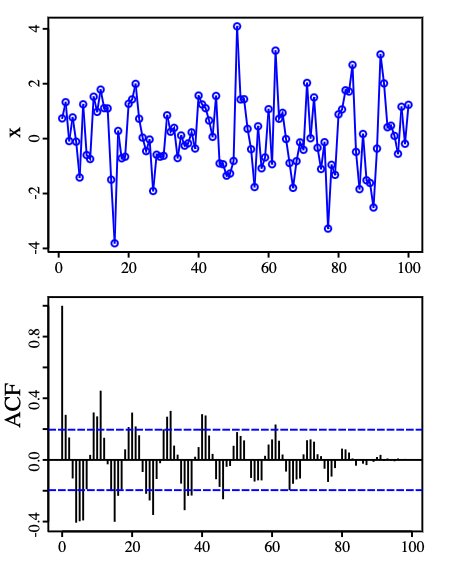

#### Visuals seasonal subseries plot and the box plot assume that the seasonal periods are known. However, if the seasonality period is not readlity apparent , the autocorrelation plot can help. 
#### If there is significant seasonality, the autocorrelation plot should show spikes at lags equal to the period.

## Seasonal Decomposition

$$ y = S + T + \epsilon $$

Seasonality + Trend + Residual

In [64]:
y = train.temp.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
result

In [65]:
result.seasonal

datetime
2012-10-07     8.545501
2012-10-14     7.255470
2012-10-21     2.468309
2012-10-28     1.820126
2012-11-04    -0.114287
                ...    
2016-12-04   -14.650102
2016-12-11   -13.263237
2016-12-18   -12.765114
2016-12-25   -13.857895
2017-01-01   -24.587601
Freq: W-SUN, Name: seasonal, Length: 222, dtype: float64

In [66]:
# Make a dataframe:

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
datetime,,,,
2012-10-07,70.595201,NaN,8.545501,NaN
2012-10-14,70.152821,NaN,7.255470,NaN
2012-10-21,71.138375,NaN,2.468309,NaN
2012-10-28,71.230464,NaN,1.820126,NaN
2012-11-04,63.510554,NaN,-0.114287,NaN


<AxesSubplot:xlabel='datetime'>

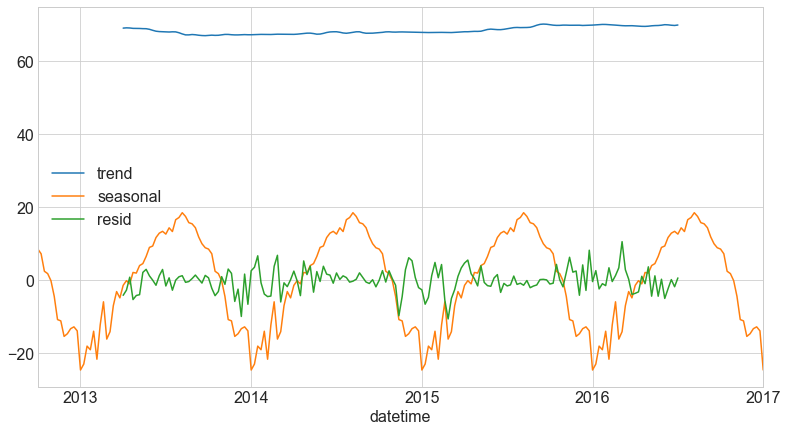

In [67]:
decomposition.iloc[:, 1:].plot()

<AxesSubplot:xlabel='datetime'>

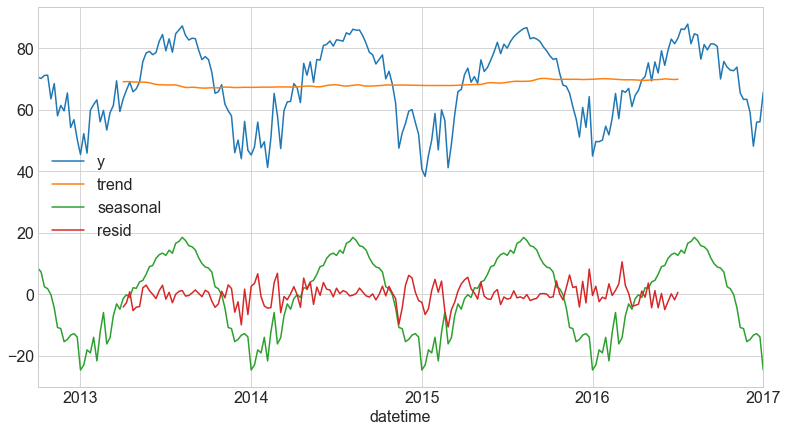

In [68]:
decomposition.iloc[:, :].plot()

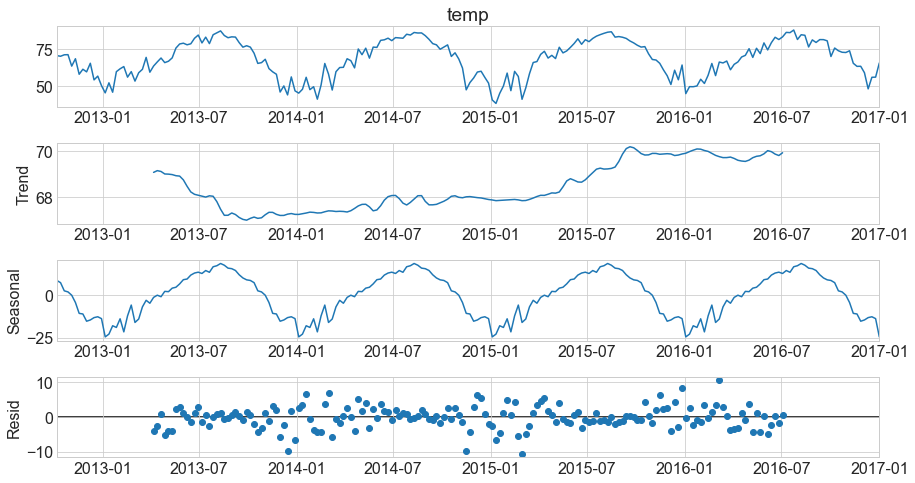

In [69]:
# the value returned from seasonal_decompose can itself be plotted:
result.plot()
None

### Additive or multiplicative seasonality?


The additive model is most appropriate if the magnitude of the seasonal fluctuations or the variation around the trend-cycle does not vary with the level of the time series. When the variation in the seasonal pattern, or the variation around the trend-cycle, appears to be proportional to the level of the time series, then a multiplicative model is more appropriate. 


https://kourentzes.com/forecasting/2014/11/09/additive-and-multiplicative-seasonality/

### Categories over time

In [70]:
train = train.resample('D').mean()
train.head()

,temp,month
datetime,,
2012-10-01,61.330942,10
2012-10-02,65.678822,10
2012-10-03,67.411250,10
2012-10-04,67.703750,10
2012-10-05,77.073125,10


In [71]:
# create a categorical feature
train['temp_bin'] = pd.qcut(train.temp, 4, labels=['cold', 'cool', 'warm', 'hot'])
train.groupby('temp_bin').temp.mean()

temp_bin
cold    49.381699
cool    65.200219
warm    75.447977
hot     83.449087
Name: temp, dtype: float64

In [72]:
train.head(2)

,temp,month,temp_bin
datetime,,,
2012-10-01,61.330942,10,cool
2012-10-02,65.678822,10,cool


How can we visualize the temp_bin feature over time?

In [73]:
train.head()

,temp,month,temp_bin
datetime,,,
2012-10-01,61.330942,10,cool
2012-10-02,65.678822,10,cool
2012-10-03,67.411250,10,cool
2012-10-04,67.703750,10,cool
2012-10-05,77.073125,10,warm


In [74]:
train.groupby('temp_bin').resample('M').size()

temp_bin  datetime  
cold      2012-10-31     6
          2012-11-30    10
          2012-12-31    16
          2013-01-31    24
          2013-02-28    17
                        ..
hot       2016-06-30    19
          2016-07-31    28
          2016-08-31    21
          2016-09-30    18
          2016-10-31     5
Length: 195, dtype: int64

In [76]:
train.groupby('temp_bin').resample('M').size().unstack(0)

temp_bin,cold,cool,warm,hot
datetime,,,,
2012-10-31,6.0,9.0,16.0,NaN
2012-11-30,10.0,16.0,4.0,NaN
2012-12-31,16.0,14.0,1.0,NaN
2013-01-31,24.0,5.0,2.0,NaN
2013-02-28,17.0,11.0,0.0,NaN
2013-03-31,11.0,16.0,4.0,NaN
2013-04-30,7.0,14.0,9.0,NaN
2013-05-31,1.0,8.0,16.0,6.0
2013-06-30,0.0,0.0,12.0,18.0


In [77]:
train.groupby('temp_bin').resample('M').size().unstack(0).fillna(0).head()

temp_bin,cold,cool,warm,hot
datetime,,,,
2012-10-31,6.0,9.0,16.0,0.0
2012-11-30,10.0,16.0,4.0,0.0
2012-12-31,16.0,14.0,1.0,0.0
2013-01-31,24.0,5.0,2.0,0.0
2013-02-28,17.0,11.0,0.0,0.0


In [78]:
train.groupby('temp_bin').resample('M').size().unstack(0).fillna(0).apply(lambda row: row / row.sum(), axis=1) 

temp_bin,cold,cool,warm,hot
datetime,,,,
2012-10-31,0.193548,0.290323,0.516129,0.000000
2012-11-30,0.333333,0.533333,0.133333,0.000000
2012-12-31,0.516129,0.451613,0.032258,0.000000
2013-01-31,0.774194,0.161290,0.064516,0.000000
2013-02-28,0.607143,0.392857,0.000000,0.000000
2013-03-31,0.354839,0.516129,0.129032,0.000000
2013-04-30,0.233333,0.466667,0.300000,0.000000
2013-05-31,0.032258,0.258065,0.516129,0.193548
2013-06-30,0.000000,0.000000,0.400000,0.600000


<AxesSubplot:xlabel='datetime'>

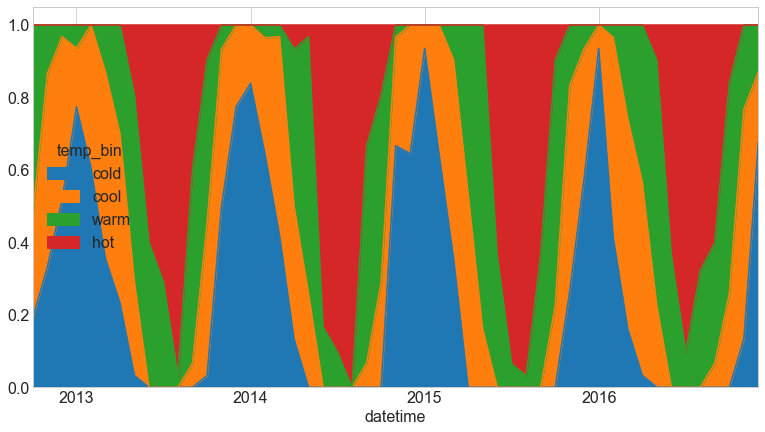

In [82]:
train.groupby('temp_bin').resample('M').size().unstack(0).fillna(0).apply(lambda row: row / row.sum(), axis=1).plot.area()

Text(0, 0.5, '% of days in the month')

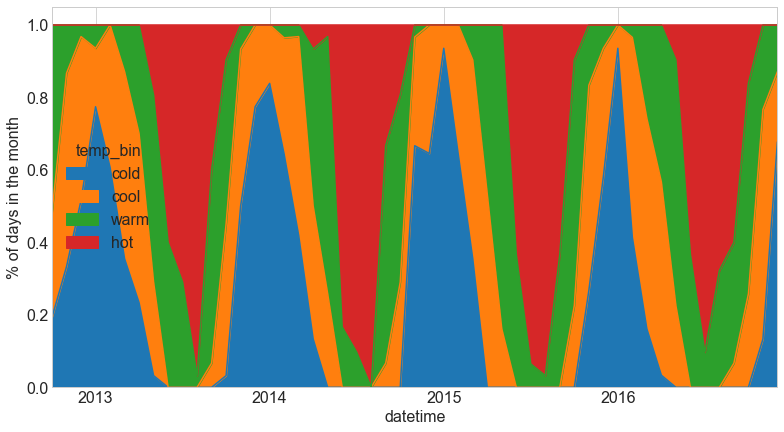

In [75]:
(train.groupby('temp_bin')
 .resample('M')
 .size() # like COUNT(*)
 .unstack(0) # turns an index level into columns
 .fillna(0)
 .astype(int)
 .apply(lambda row: row / row.sum(), axis=1) # raw nums to % of the row
 .plot.area()
)
plt.ylabel('% of days in the month')

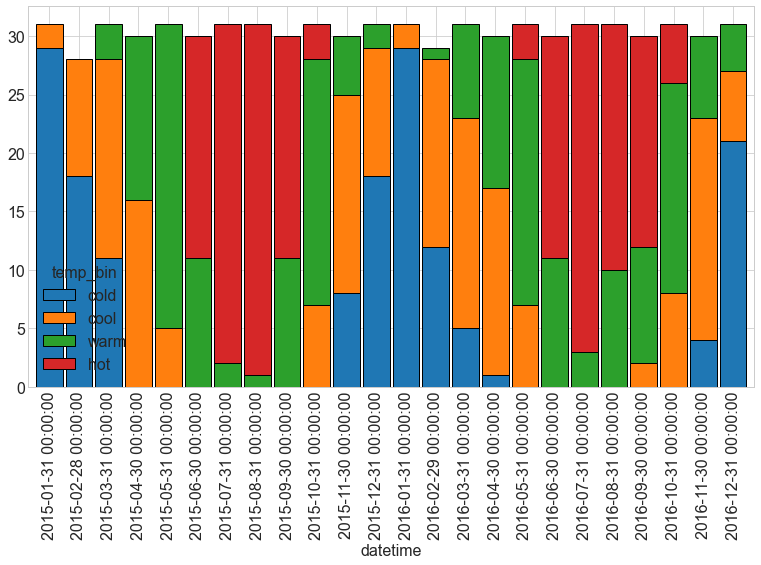

In [83]:
ax = (train['2015':'2016']
 .groupby('temp_bin')
 .resample('M')
 .size()
 .unstack(0)
 .plot.bar(stacked=True, width=.9, ec='black')
)

In [85]:
ax.get_xticklabels()

[Text(0, 0, '2015-01-31 00:00:00'),
 Text(1, 0, '2015-02-28 00:00:00'),
 Text(2, 0, '2015-03-31 00:00:00'),
 Text(3, 0, '2015-04-30 00:00:00'),
 Text(4, 0, '2015-05-31 00:00:00'),
 Text(5, 0, '2015-06-30 00:00:00'),
 Text(6, 0, '2015-07-31 00:00:00'),
 Text(7, 0, '2015-08-31 00:00:00'),
 Text(8, 0, '2015-09-30 00:00:00'),
 Text(9, 0, '2015-10-31 00:00:00'),
 Text(10, 0, '2015-11-30 00:00:00'),
 Text(11, 0, '2015-12-31 00:00:00'),
 Text(12, 0, '2016-01-31 00:00:00'),
 Text(13, 0, '2016-02-29 00:00:00'),
 Text(14, 0, '2016-03-31 00:00:00'),
 Text(15, 0, '2016-04-30 00:00:00'),
 Text(16, 0, '2016-05-31 00:00:00'),
 Text(17, 0, '2016-06-30 00:00:00'),
 Text(18, 0, '2016-07-31 00:00:00'),
 Text(19, 0, '2016-08-31 00:00:00'),
 Text(20, 0, '2016-09-30 00:00:00'),
 Text(21, 0, '2016-10-31 00:00:00'),
 Text(22, 0, '2016-11-30 00:00:00'),
 Text(23, 0, '2016-12-31 00:00:00')]

In [86]:
ax.get_xticklabels()[0].get_text()

'2015-01-31 00:00:00'

In [87]:
pd.to_datetime(ax.get_xticklabels()[0].get_text())

Timestamp('2015-01-31 00:00:00')

In [88]:
pd.to_datetime(ax.get_xticklabels()[0].get_text()).strftime('%B')

'January'

In [89]:
labels = [pd.to_datetime(t.get_text()).strftime('%B') for t in ax.get_xticklabels()]
labels

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December',
 'January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

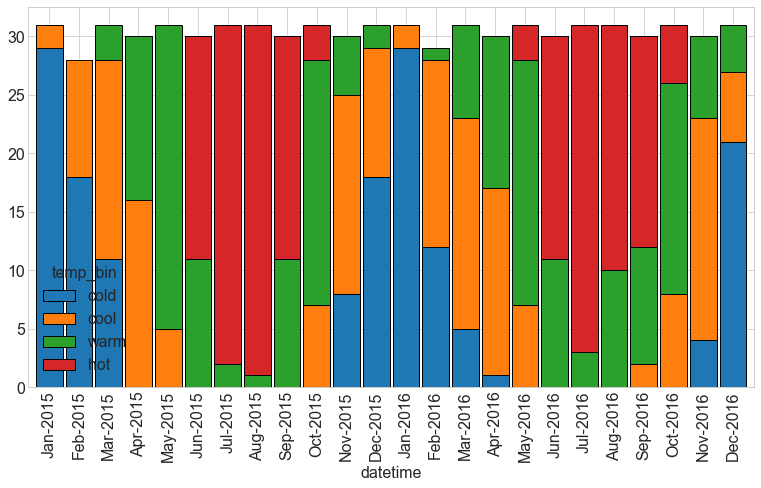

In [95]:
ax = (train['2015':'2016']
 .groupby('temp_bin')
 .resample('M')
 .size()
 .unstack(0)
 .plot.bar(stacked=True, width=.9, ec='black')
)

# take the existing labels, convert them to Timestamps, and then reformat with .strftime
labels = [pd.to_datetime(t.get_text()).strftime('%b-%Y') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels);

### strftime

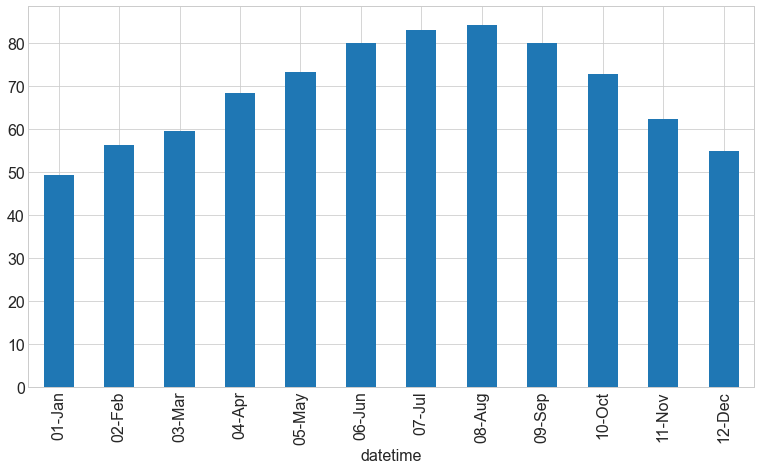

In [93]:
ax = y.groupby(y.index.strftime('%m-%b')).mean().plot.bar()

<AxesSubplot:xlabel='datetime'>

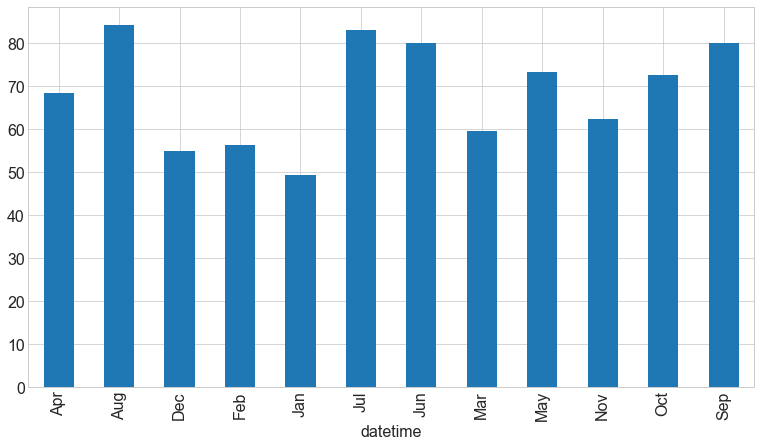

In [97]:
y.groupby(y.index.strftime('%b')).mean().plot.bar()

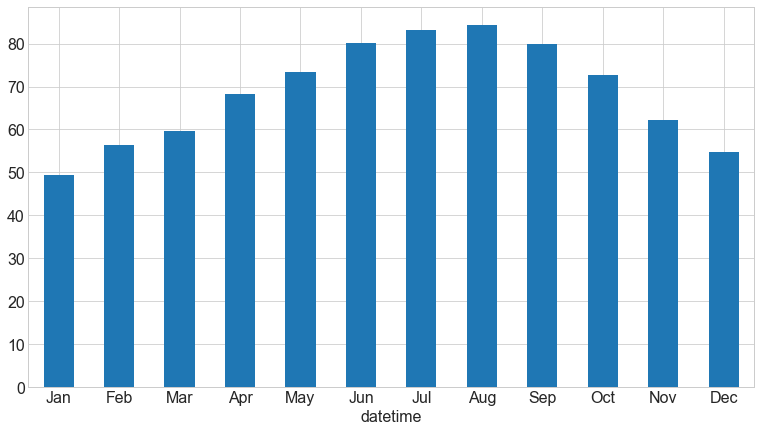

In [96]:
ax = y.groupby(y.index.strftime('%m-%b')).mean().plot.bar()
ax.set_xticklabels([t.get_text()[3:] for t in ax.get_xticklabels()], rotation=0);

### Matplotlib Dates
This will only work with plt.plot or ax.plot, not with the pandas plotting!

<AxesSubplot:xlabel='datetime'>

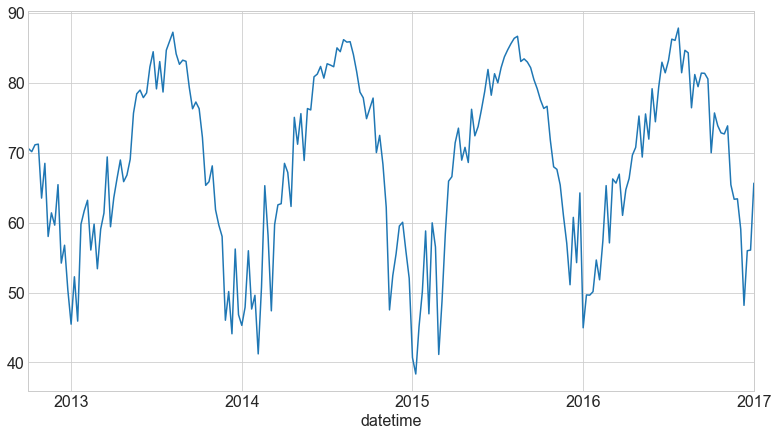

In [98]:
# how can i customize the x axis label here?

y.resample('W').mean().plot()

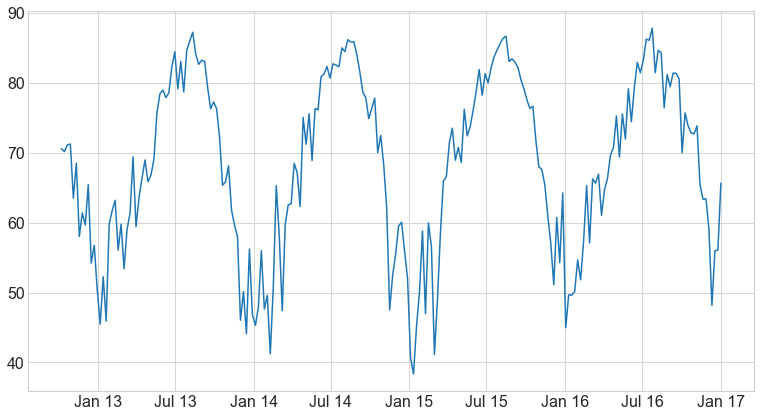

In [99]:
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots()

weekly = y.resample('W').mean()

ax.plot(weekly.index, weekly)

ax.xaxis.set_major_formatter(DateFormatter('%b %y'))